📊 Gini Coefficient: 0.3780


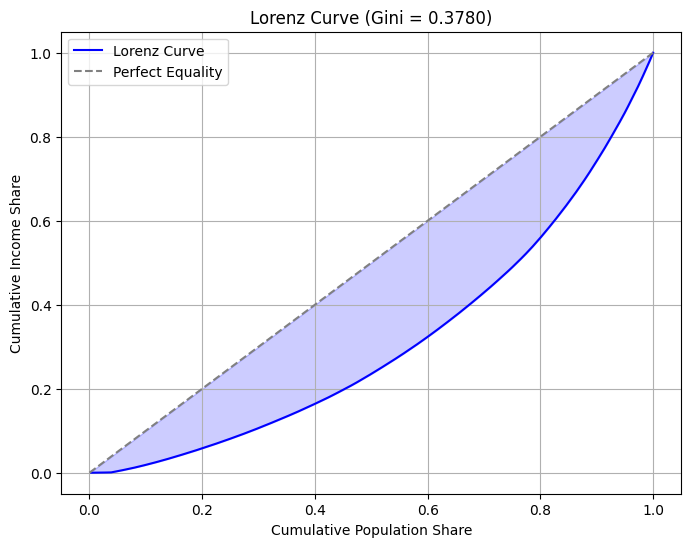

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data-wealth-110.csv")
df_110 = df[df["year"] == 110].reset_index(drop=True)

def gini_coefficient(values):
    """Calculate the Gini coefficient correctly."""
    values = np.sort(values)  # Sort incomes
    n = len(values)
    mean_income = np.mean(values)  # Mean income

    # Compute absolute pairwise differences
    abs_diffs = np.abs(values[:, None] - values).sum()
    
    # Correct Gini calculation
    gini = abs_diffs / (2 * n**2 * mean_income)
    return gini

def plot_lorenz_curve(values):
    """Plot the Lorenz curve with Gini coefficient."""
    values = np.sort(values)  # Sort income values
    n = len(values)
    
    # Compute cumulative income share
    cumulative_income = np.cumsum(values) / values.sum()
    cumulative_pop = np.arange(1, n + 1) / n  # Cumulative population share
    
    # Plot Lorenz curve
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_pop, cumulative_income, label="Lorenz Curve", color="blue")  # Lorenz curve
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Equality")  # 45-degree line
    
    # Gini coefficient calculation
    gini_value = gini_coefficient(values)
    plt.fill_between(cumulative_pop, cumulative_pop, cumulative_income, color="blue", alpha=0.2)
    
    # Labels & styling
    plt.xlabel("Cumulative Population Share")
    plt.ylabel("Cumulative Income Share")
    plt.title(f"Lorenz Curve (Gini = {gini_value:.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Filter valid values (positive incomes only)
filtered_values = df_110["income"].dropna()
filtered_values = filtered_values[filtered_values > 0]  # Remove non-positive values

# Compute & print Gini coefficient
gini_value = gini_coefficient(filtered_values.values)
print(f"📊 Gini Coefficient: {gini_value:.4f}")

# Plot Lorenz Curve
plot_lorenz_curve(filtered_values.values)